# Final Project Group 7

# Authors: Leroy Musa, Chan Woo Hwang, Gordon Hamilton, Joaquin Philco

**Original Dataset Source: House Prices 2023 Dataset. gigasheet. https://www.gigasheet.com/sample-data/house-prices-2023-dataset**


**Modified Dataset: Student Performance https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv**


# 2. Acquiring Dataset

In [544]:
# Import libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Avoiding deprecated warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Download the dataset
url = "https://raw.githubusercontent.com/leroymusa/EECS3401-Final-Project/main/house_prices.csv"
housing_prices = pd.read_csv(url, sep=',')

# Let's create a backup copy of the dataset
housing_backup = housing_prices

In [545]:
housing_prices.head() 

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [546]:

housing_prices.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99499 entries, 0 to 99498
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     99499 non-null  int64  
 1   property_type  99499 non-null  object 
 2   price          99499 non-null  int64  
 3   location       99499 non-null  object 
 4   city           99499 non-null  object 
 5   baths          99499 non-null  int64  
 6   purpose        99499 non-null  object 
 7   bedrooms       99499 non-null  int64  
 8   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.8+ MB


In [547]:
housing_prices.describe()

,Unnamed: 0,price,baths,bedrooms,Area_in_Marla
count,99499.000000,9.949900e+04,99499.000000,99499.000000,99499.000000
mean,78883.893064,1.037592e+07,3.530106,3.350737,8.757479
std,48239.423663,1.066000e+07,1.474217,1.255913,7.466471
min,0.000000,1.550000e+04,1.000000,0.000000,0.000000
25%,37236.500000,1.500000e+05,2.000000,2.000000,4.800000
50%,76065.000000,7.500000e+06,3.000000,3.000000,6.700000
75%,119401.500000,1.550000e+07,5.000000,4.000000,10.000000
max,168445.000000,4.490000e+07,7.000000,6.000000,194.000000


# 3. Exploratory Data Analysis of the Dataset

## 3.1 EDAs for Non-Vumerical Variables

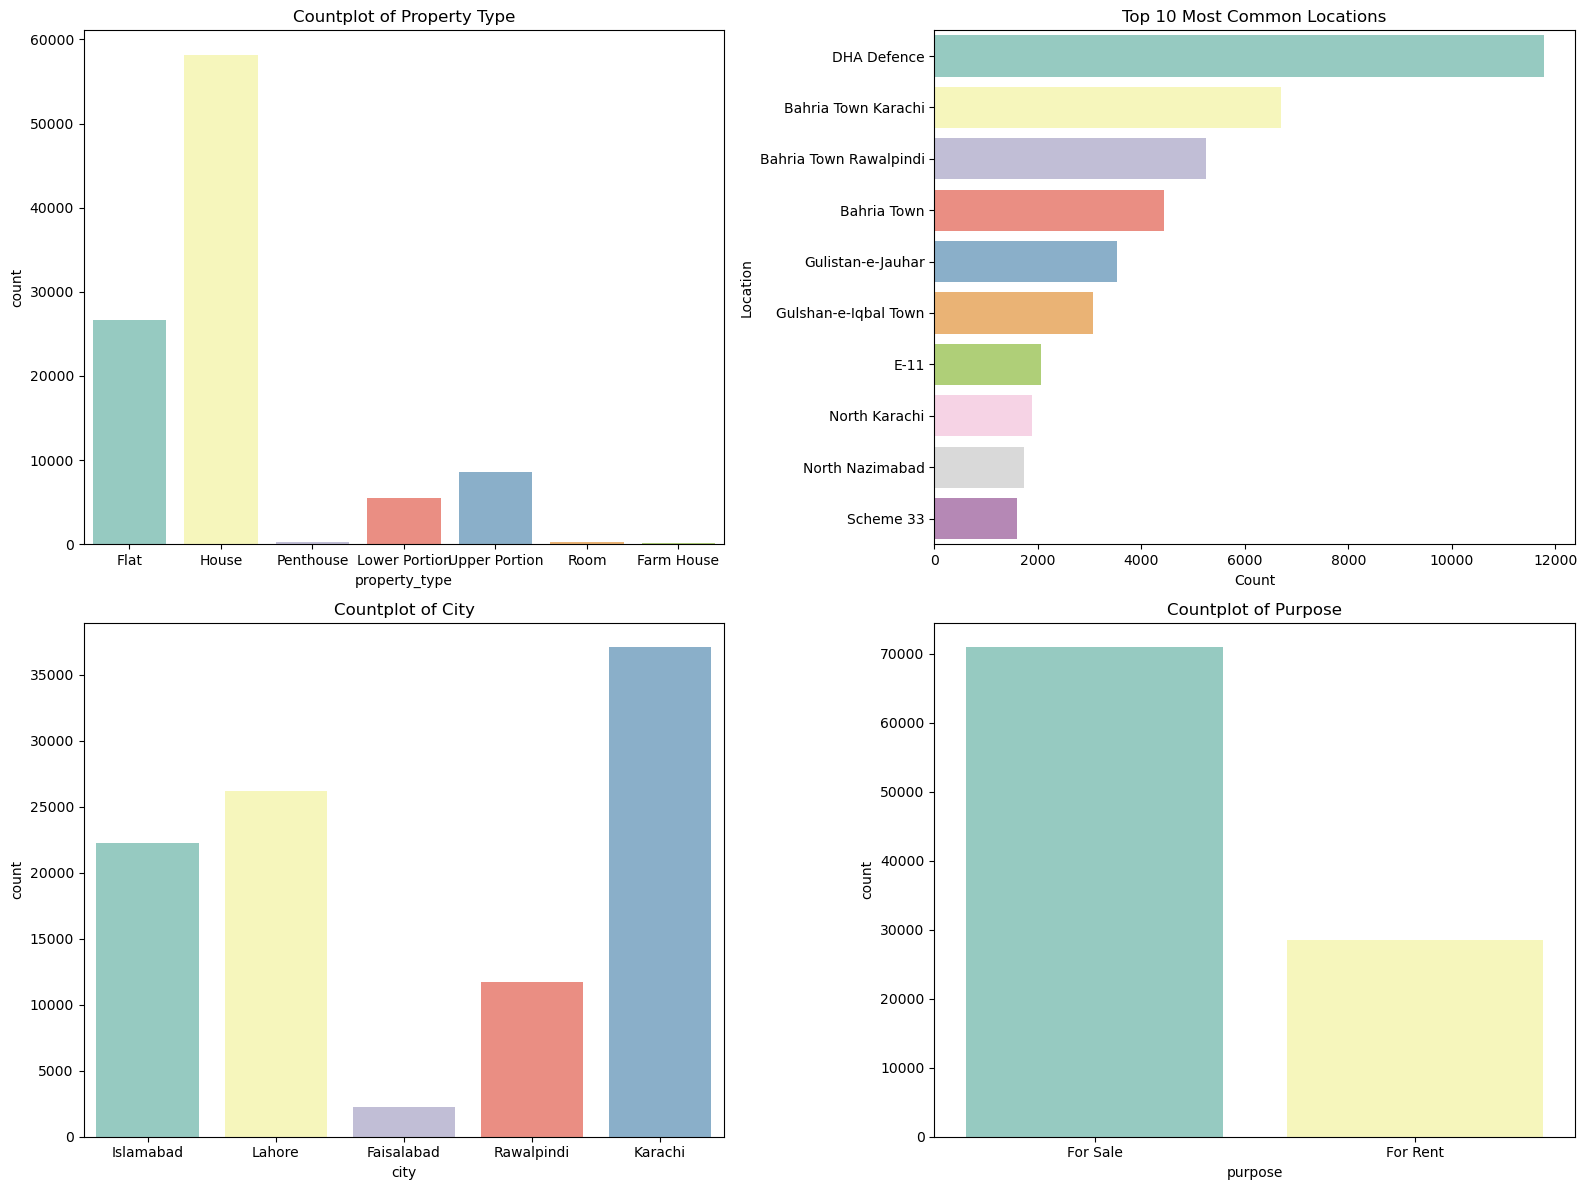

In [548]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Property Type Count Plot
sns.countplot(x='property_type', data=housing_prices, palette='Set3', ax=axes[0, 0])
axes[0, 0].set_title('Countplot of Property Type')

# Location Count Plot
location_counts = housing_prices['location'].value_counts().head(10)
sns.barplot(x=location_counts.values, y=location_counts.index, palette='Set3', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Most Common Locations')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Location')

# City Count Plot
sns.countplot(x='city', data=housing_prices, palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Countplot of City')

# Purpose Count Plot
sns.countplot(x='purpose', data=housing_prices, palette='Set3', ax=axes[1, 1])
axes[1, 1].set_title('Countplot of Purpose')

plt.tight_layout()
plt.show()

## 3.2 EDAs for Numerical Variables

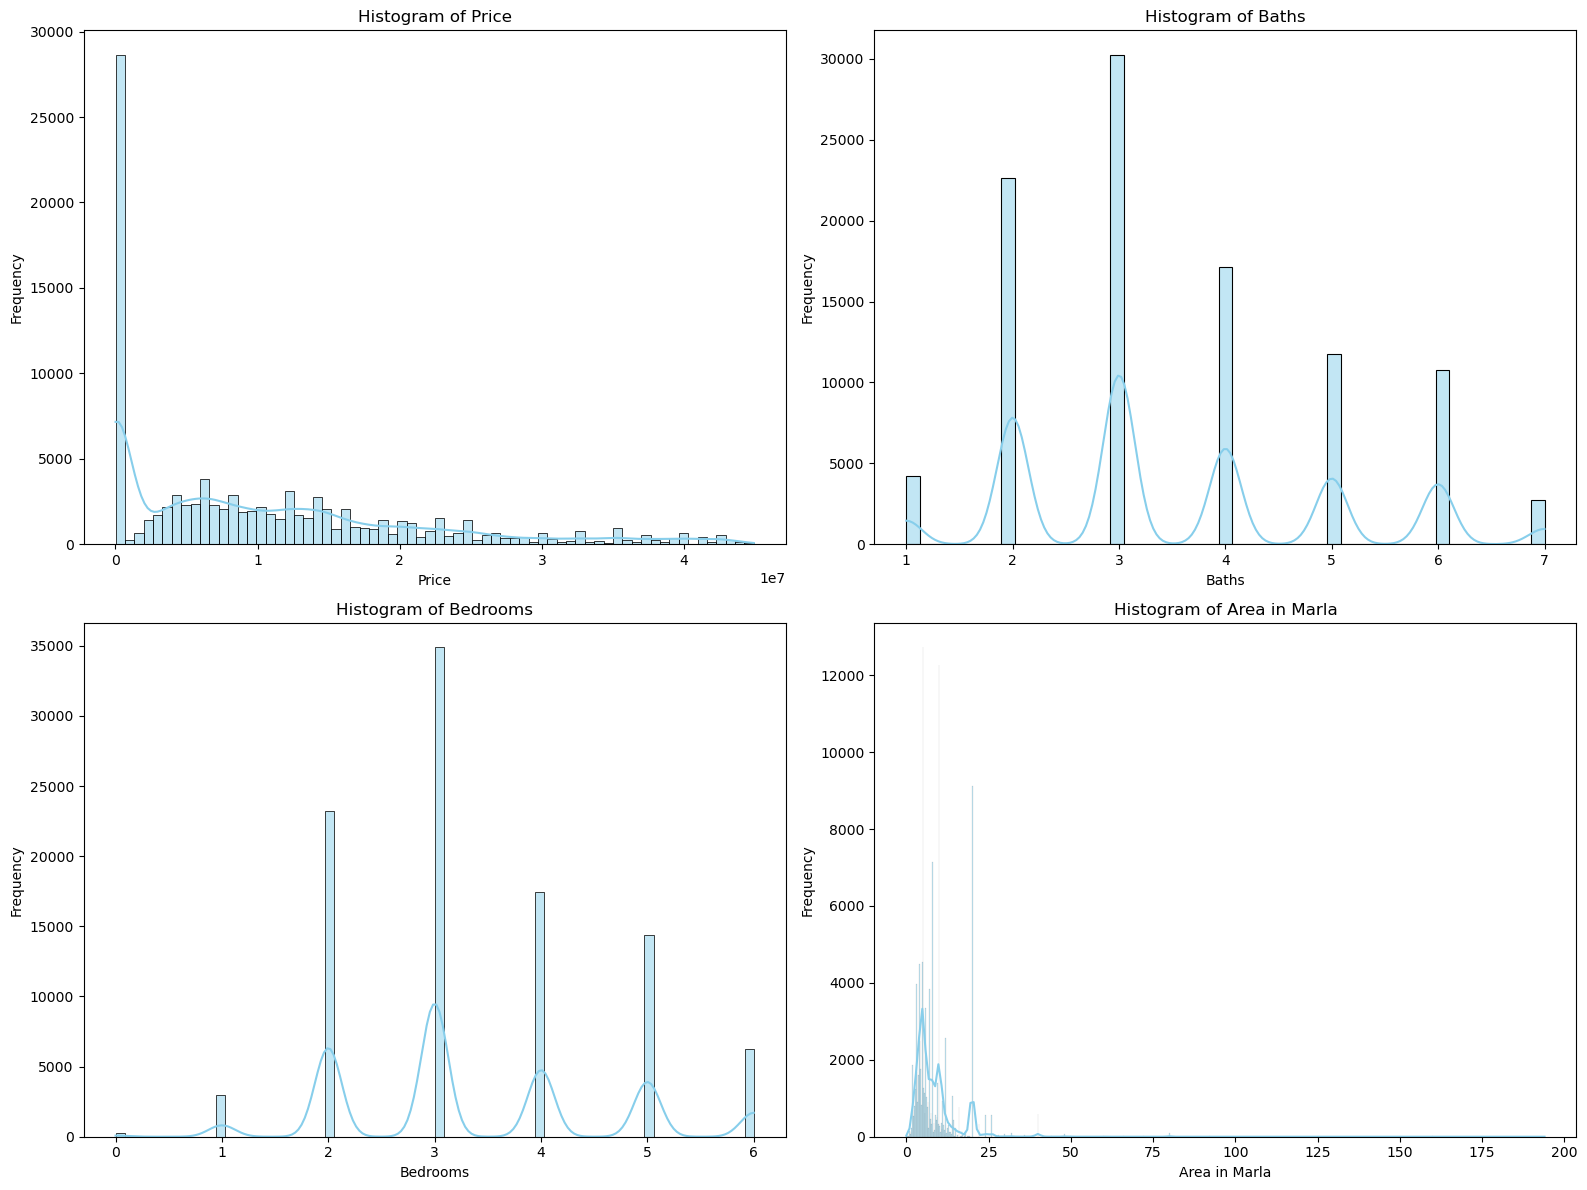

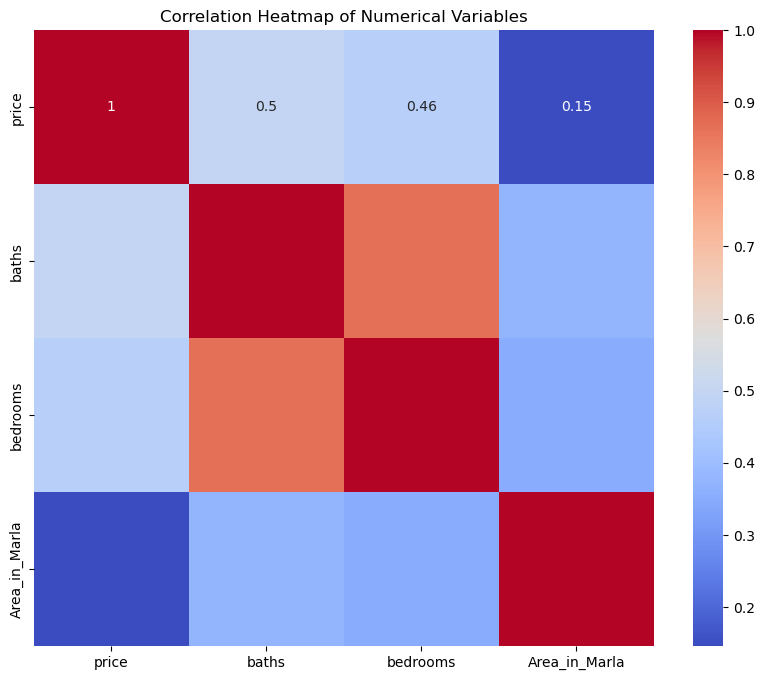

In [549]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram of Price
sns.histplot(data=housing_prices, x='price', kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Price')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Histogram of Baths
sns.histplot(data=housing_prices, x='baths', kde=True, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Baths')
axes[0, 1].set_xlabel('Baths')
axes[0, 1].set_ylabel('Frequency')

# Histogram of Bedrooms
sns.histplot(data=housing_prices, x='bedrooms', kde=True, color='skyblue', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Bedrooms')
axes[1, 0].set_xlabel('Bedrooms')
axes[1, 0].set_ylabel('Frequency')

# Histogram of Area in Marla
sns.histplot(data=housing_prices, x='Area_in_Marla', kde=True, color='skyblue', ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Area in Marla')
axes[1, 1].set_xlabel('Area in Marla')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# # Pairplot
# plt.figure(figsize=(30, 20))
# sns.pairplot(data=housing_prices[['price', 'baths', 'bedrooms', 'Area_in_Marla']], hue="price", corner=True, dropna=True, palette="ch:r=-.5,l=.75")
# plt.title('Pairplot of Numerical Variables')
# plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing_prices[['price', 'baths', 'bedrooms', 'Area_in_Marla']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [550]:
corr_matrix = housing_prices.corr(numeric_only=True)
corr_matrix

,Unnamed: 0,price,baths,bedrooms,Area_in_Marla
Unnamed: 0,1.000000,-0.007957,0.001672,-0.015748,0.061182
price,-0.007957,1.000000,0.496222,0.464393,0.145644
baths,0.001672,0.496222,1.000000,0.863885,0.373993
bedrooms,-0.015748,0.464393,0.863885,1.000000,0.352021
Area_in_Marla,0.061182,0.145644,0.373993,0.352021,1.000000


In [551]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
baths            0.496222
bedrooms         0.464393
Area_in_Marla    0.145644
Unnamed: 0      -0.007957
Name: price, dtype: float64

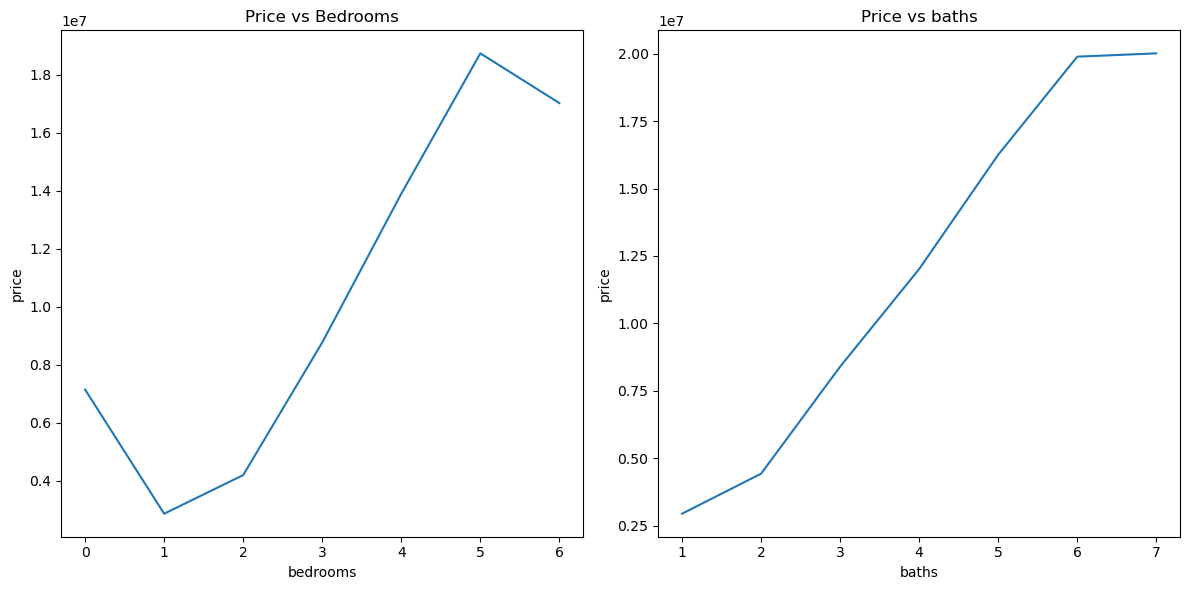

In [552]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#plot bedrooms vs. price
sns.lineplot(x="bedrooms", y="price", data=housing_prices, errorbar=None, ax=axs[0])
axs[0].set_title('Price vs Bedrooms')

# Plot the second graph
sns.lineplot(x="baths", y="price", data=housing_prices, errorbar=None,ax=axs[1])
axs[1].set_title('Price vs baths')

# Show the plots
plt.tight_layout()
plt.show()

# 4. Preparing the Dataset for Machine Learning Models

## 4.1 Removing Unnecessary Columns

In [553]:
# Removing unnecessary Headers
housing_prices = housing_prices.drop('Unnamed: 0', axis=1) # Unnecessary
housing_prices = housing_prices.drop('location', axis=1) # Columns has too many different categorical tags

## 4.2 Remove Duplicate Rows


In [554]:
# Check for duplicate rows and delete them
housing_prices.duplicated().sum()

# Remove duplicated
housing_prices .drop_duplicates(inplace=True)

## 4.3 Handle Missing Values

In [555]:
# Find the number of missing values in each column
housing_prices.isna().sum()


property_type    0
price            0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64

## 4.4 Checking for Unnatural Zero Values

In [556]:
columns_to_check = ['price', 'baths', 'bedrooms', 'Area_in_Marla']

def count_zeros(column_name, dataframe):
    return (dataframe[column_name] == 0).sum()

for column in columns_to_check:
    print("Number of zeros in the", column, "column:", count_zeros(column, housing_prices))


Number of zeros in the price column: 0
Number of zeros in the baths column: 0
Number of zeros in the bedrooms column: 281
Number of zeros in the Area_in_Marla column: 10


## 4.5 Dropping Bedroom Rows
Bedrooms have a substantial amount of zeros for a variable that can not take zero as an answer. (There is no house with zero rooms.). Therefore, we will drop the rows that the zeros in them.

In [557]:
# Remove rows with zero bedrooms
housing_prices = housing_prices[housing_prices['bedrooms'] != 0]

# Check Updated data frame
print("Number of zeros in the bedroom column:", (housing_prices["bedrooms"] == 0).sum())

Number of zeros in the bedroom column: 0


## 4.6 Getting Rid of Outliners

In [558]:
# Remove entries where 'Area_in_Marla' is greater than 15.0
housing_prices = housing_prices[housing_prices['Area_in_Marla'] <= 15]

# Remove entries from property_type that are so rare that can be negliable
types_to_remove = ["Penthouse", "Room", "Farm House"]
housing_prices = housing_prices[~housing_prices['property_type'].isin(types_to_remove)]

# Remove entries from city that are so rare that can be negliable
types_to_remove = ["Faisalabad city"]
housing_prices = housing_prices[~housing_prices['city'].isin(types_to_remove)]

# Remove all outliners from the beguinning and end of the prices column
housing_prices = housing_prices[(housing_prices['price'] <= 3e7) & (housing_prices['price'] >= 0.05e7)]


## 4.7 Preprocessing Pipeline
1. Fill in the missing numerical values with the mean using a SimpleImputer
2. Scale the numerical columns using StandardScaler. Do not scale the target
3. Encode the categorical columns using OneHotEncoder

In [559]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [560]:
# Assuming numerical_columns and categorical_columns are lists of column names
numerical_columns = housing_prices.select_dtypes(include='number').columns.to_list()
categorical_columns = housing_prices.select_dtypes(exclude='number').columns.to_list()

#exclude the target from numerical columns
numerical_columns.remove("price")


# Create preprocessing pipeline for numerical columns
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Create preprocessing pipeline for categorical columns
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines for numerical and categorical columns
preprocessing_pipeline = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_columns),
    ('categorical', categorical_pipeline, categorical_columns)],
    remainder='passthrough')

# Display the preprocessing pipeline
preprocessing_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['baths', 'bedrooms', 'Area_in_Marla']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['property_type', 'city', 'purpose'])])

In [561]:
# # Apply the preprocessing pipeline on the dataset
housing_prepared = preprocessing_pipeline.fit_transform(housing_prices)

# Scikit-learn strips the column headers in most cases, so just add them back on afterward.
feature_names=preprocessing_pipeline.get_feature_names_out()
housing_prepared = pd.DataFrame(data=housing_prepared, columns=feature_names)

housing_prepared



,numerical__baths,numerical__bedrooms,numerical__Area_in_Marla,categorical__property_type_Flat,categorical__property_type_House,categorical__property_type_Lower Portion,categorical__property_type_Upper Portion,categorical__city_Faisalabad,categorical__city_Islamabad,categorical__city_Karachi,categorical__city_Lahore,categorical__city_Rawalpindi,categorical__purpose_For Rent,categorical__purpose_For Sale,remainder__price
0,-0.882840,-1.001416,-0.682818,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10000000.0
1,-0.218585,-0.240366,-0.134169,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6900000.0
2,1.774182,1.281733,0.688804,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,16500000.0
3,-0.218585,-0.240366,0.688804,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7000000.0
4,-0.882840,-1.001416,0.071574,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25312,0.445671,0.520683,1.648940,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14600000.0
25313,2.438437,1.281733,1.374616,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,19400000.0
25314,-0.882840,-1.001416,-0.888561,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,12400000.0
25315,2.438437,1.281733,1.374616,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,17700000.0


## 4.8 Plot Updated Histograms and Correlation Matrix

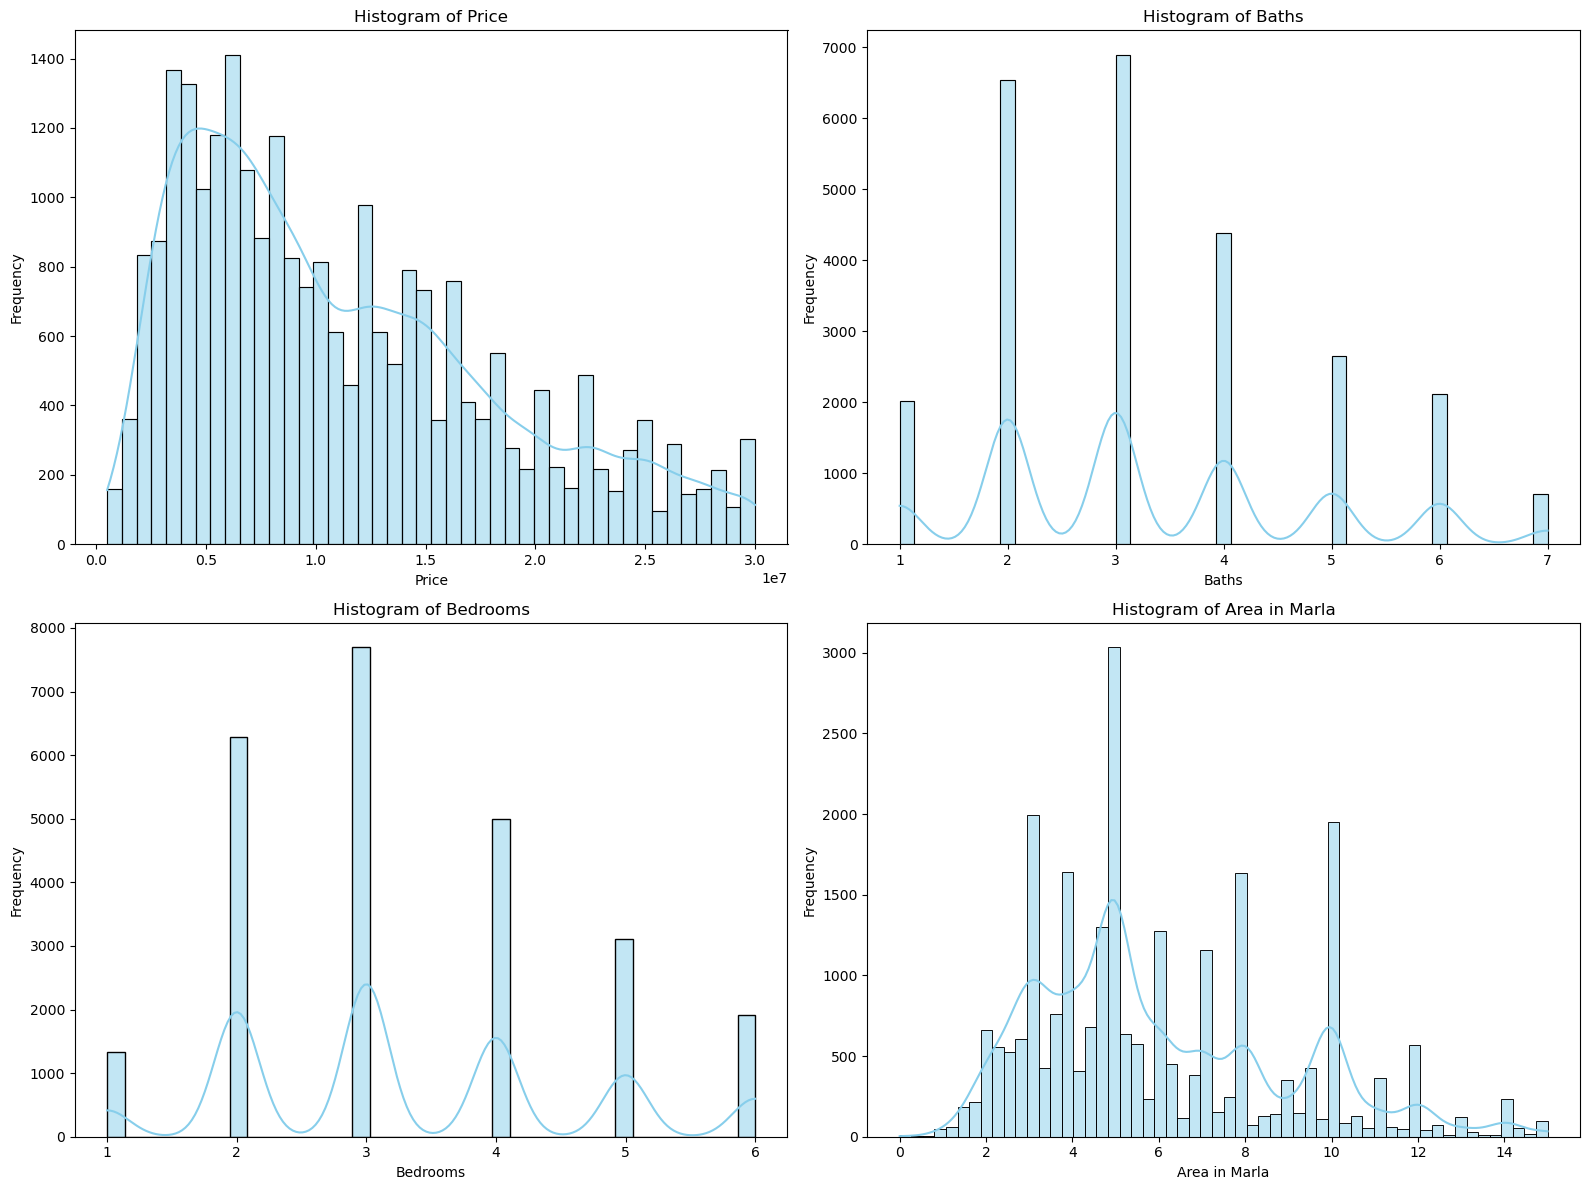

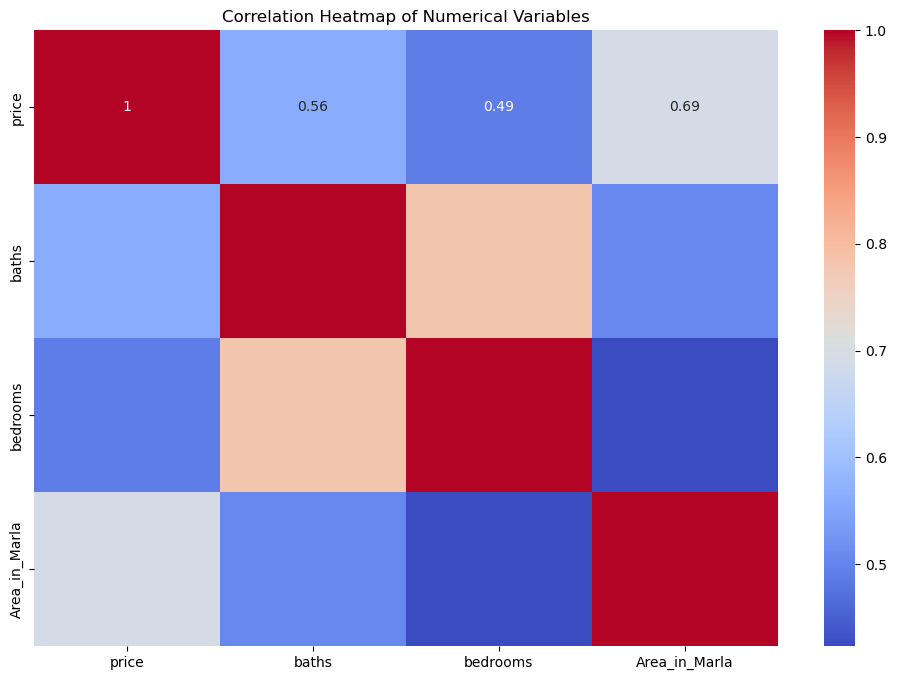

In [562]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram of Price
sns.histplot(data=housing_prices, x='price', kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Price')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

# Histogram of Baths
sns.histplot(data=housing_prices, x='baths', kde=True, color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Histogram of Baths')
axes[0, 1].set_xlabel('Baths')
axes[0, 1].set_ylabel('Frequency')

# Histogram of Bedrooms
sns.histplot(data=housing_prices, x='bedrooms', kde=True, color='skyblue', ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Bedrooms')
axes[1, 0].set_xlabel('Bedrooms')
axes[1, 0].set_ylabel('Frequency')

# Histogram of Area in Marla
sns.histplot(data=housing_prices, x='Area_in_Marla', kde=True, color='skyblue', ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Area in Marla')
axes[1, 1].set_xlabel('Area in Marla')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(housing_prices[['price', 'baths', 'bedrooms', 'Area_in_Marla']].corr(), annot=True, cmap='coolwarm',xticklabels=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# 5. Model Selection and Training

## 5.1 Split the dataset into a training dataset (80%) and testing dataset.

In [563]:
from sklearn.model_selection import train_test_split

X = housing_prepared.drop(["remainder__price"], axis=1)
y = housing_prepared["remainder__price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(20253, 14) (20253,) (5064, 14) (5064,)
